In [ ]:
# import libraries
# set up gcfs connection
# pull in data
# run analysis

In [14]:
from google.cloud import storage
from google.oauth2 import service_account

import geopandas as gpd
import os
from pathlib import Path
from io import BytesIO

In [10]:
# Set up credentials using pathlib
credentials_path = Path.cwd().parent / "credentials" / "service-acount-key.json"
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = str(credentials_path)

# Initialize client with explicit credentials and project
credentials = service_account.Credentials.from_service_account_file(
    str(credentials_path)
)
client = storage.Client(credentials=credentials, project="ee-ciut")

# Work directly with the bucket name
bucket_name = "ciut-tablero"
bucket = client.bucket(bucket_name)

In [ ]:
# List objects in the bucket
print(f"Listing objects in {bucket_name}:")
blobs = list(bucket.list_blobs(max_results=10))
for blob in blobs:
    print(f"- {blob.name}")

Listing objects in ciut-tablero:
- 2023/
- 2023/MAPAS/LP_Riesgo Hidrico.jpeg
- 2023/MAPAS/LP_Riesgo Hidrico.pdf
- 2023/MAPAS/LP_Vulnerabilidad-Sintesis.jpeg
- 2023/MAPAS/LP_Vulnerabilidad-Sintesis.pdf
- 2023/MAPAS/Vulnerabilidad-Exposicion-Riesgo_Noviembre 23/Imagen/LP_Exposicion.jpeg
- 2023/MAPAS/Vulnerabilidad-Exposicion-Riesgo_Noviembre 23/Imagen/LP_Riesgo.jpeg
- 2023/MAPAS/Vulnerabilidad-Exposicion-Riesgo_Noviembre 23/Imagen/LP_Vulnerabilidad ambiental.jpeg
- 2023/MAPAS/Vulnerabilidad-Exposicion-Riesgo_Noviembre 23/Imagen/LP_Vulnerabilidad socieconomica.jpeg
- 2023/MAPAS/Vulnerabilidad-Exposicion-Riesgo_Noviembre 23/Imagen/LP_Vulnerabilidad.jpeg


In [12]:
# List all blobs in the 2024 directory
prefix = "2024/"
print(f"Searching for GIS files in {prefix}...")

# Get all blobs with the prefix
blobs = bucket.list_blobs(prefix=prefix)

# Filter for GIS files
gis_files = []
for blob in blobs:
    if blob.name.lower().endswith((".shp", ".geojson", ".json")):
        gis_files.append(blob.name)

# Print results
if gis_files:
    print("\nFound GIS files:")
    for file in gis_files:
        print(f"- {file}")
else:
    print("\nNo GIS files found in 2024 directory")

Searching for GIS files in 2024/...

Found GIS files:
- 2024/R25_Riesgo_Rural.geojson
- 2024/R25_Riesgo_Urbano.geojson
- 2024/Resultados ingenieria_mayo 24/Resultados/shapes/Cuenca_Maldonado_v9b_smooth5.shp
- 2024/Resultados ingenieria_mayo 24/Resultados/shapes/Dominio_2.shp
- 2024/Resultados ingenieria_mayo 24/Resultados/shapes/H_100_cauces.shp
- 2024/Resultados ingenieria_mayo 24/Resultados/shapes/H_25_cauces.shp
- 2024/Resultados ingenieria_mayo 24/Resultados/shapes/S_100_cauces.shp
- 2024/Resultados ingenieria_mayo 24/Resultados/shapes/S_25_cauces.shp
- 2024/archivos en JSON/JSON_Anteriores/R100_Riesgo_Rural.geojson
- 2024/archivos en JSON/JSON_Anteriores/R100_Riesgo_Urbano.geojson
- 2024/archivos en JSON/JSON_Anteriores/R100_peligrosidad.geojson
- 2024/archivos en JSON/JSON_Anteriores/R100_riesgo.geojson
- 2024/archivos en JSON/JSON_Anteriores/R25_peligrosidad.geojson
- 2024/archivos en JSON/JSON_Anteriores/R25_riesgo.geojson


In [15]:
# Load the riesgo rural data
riesgo_rural_blob = bucket.blob("2024/R25_Riesgo_Rural.geojson")
riesgo_rural_content = riesgo_rural_blob.download_as_bytes()
riesgo_rural = gpd.read_file(BytesIO(riesgo_rural_content))

In [16]:
riesgo_rural.head()

,fid,link,PROV,DEPTO,CODLOC,FRAC,RADIO,MZA,ambiental,fisica,socioeco,exposicion,vulnerab,densidad,peli,riesgo,geometry
0,1,064414111,06,441,441,41,11,006,1,0,0,1,2,0.88,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6411861.621 6128538.962, 64117..."
1,2,064414111,06,441,441,41,11,005,1,0,0,1,2,0.88,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6411729.336 6128678.183, 64117..."
2,3,064414111,06,441,441,41,11,007,1,0,0,1,2,0.88,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6411841.116 6128517.533, 64118..."
3,4,064414111,06,441,441,41,11,003,1,0,0,1,2,0.88,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6411534.911 6129308.313, 64115..."
4,5,064414111,06,441,441,41,11,005,1,0,0,1,2,0.88,Muy Bajo o Nulo,Bajo,"MULTIPOLYGON (((6411569.073 6128799.481, 64118..."


<Axes: >

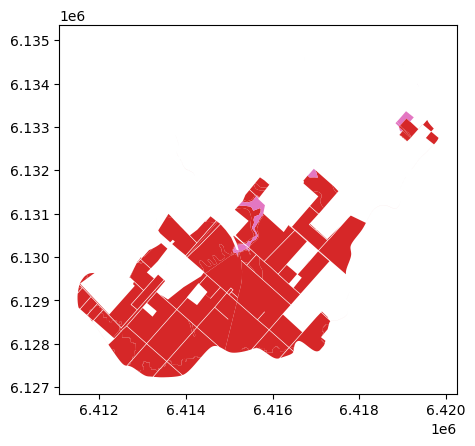

In [17]:
riesgo_rural.plot("riesgo")

In [ ]:
# pull in peligrosidad
# pull in population data points
# pull in vulnerability data points
# calculate summary stats per cuenca (will need cuenca data)

# OPTIONAL: dasymmetric mapping with GHSL landcover
# (choose GHSL because can be combined with historic census data back to 1990)